In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical

: 

In [2]:
data = pd.read_csv(r"A_Z Handwritten Data.csv").astype('float32')

In [3]:
X = data.drop('0',axis = 1)
y = data['0']

# 0.2 dl cho test con lai train
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

In [4]:
# Reshape data for model creation
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("The new shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("The new shape of train data: ", test_X.shape)

train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("The new shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("The new shape of test labels: ", test_yOHE.shape)

The new shape of train data:  (297960, 28, 28, 1)
The new shape of train data:  (74490, 28, 28, 1)
The new shape of train labels:  (297960, 26)
The new shape of test labels:  (74490, 26)


In [5]:
# Mô hình tuần tự
model = Sequential()

# # Chạy model conv2d+rlu tạo các filters
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

# # Chuyển đổi sang vetor
model.add(Flatten())

# # max(0,x)
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

# # softmax
model.add(Dense(26,activation ="softmax"))

In [6]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# traning
history = model.fit(train_X, train_yOHE, epochs=5, validation_data = (test_X,test_yOHE))


Epoch 1/5
9312/9312 [==============================] - 179s 19ms/step - loss: 0.1656 - accuracy: 0.9543 - val_loss: 0.0806 - val_accuracy: 0.9775
Epoch 2/5
9312/9312 [==============================] - 169s 18ms/step - loss: 0.0721 - accuracy: 0.9799 - val_loss: 0.0700 - val_accuracy: 0.9813
Epoch 3/5
9312/9312 [==============================] - 172s 19ms/step - loss: 0.0607 - accuracy: 0.9832 - val_loss: 0.0607 - val_accuracy: 0.9838
Epoch 4/5
9312/9312 [==============================] - 172s 18ms/step - loss: 0.0541 - accuracy: 0.9853 - val_loss: 0.0727 - val_accuracy: 0.9816
Epoch 5/5
9312/9312 [==============================] - 171s 18ms/step - loss: 0.0521 - accuracy: 0.9861 - val_loss: 0.0557 - val_accuracy: 0.9856


In [7]:

model.summary()

# lưu mô hình traning
model.save(r'model_hand.h5')

print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [8]:
model = load_model(r'model_hand.h5')

In [9]:
loss, acc = model.evaluate(test_X,test_yOHE)

2328/2328 [==============================] - 15s 6ms/step - loss: 0.0557 - accuracy: 0.9856


In [10]:
print("Loss test:",loss)
print("Acc test:",acc)

Loss test: 0.055682409554719925
Acc test: 0.9855685234069824


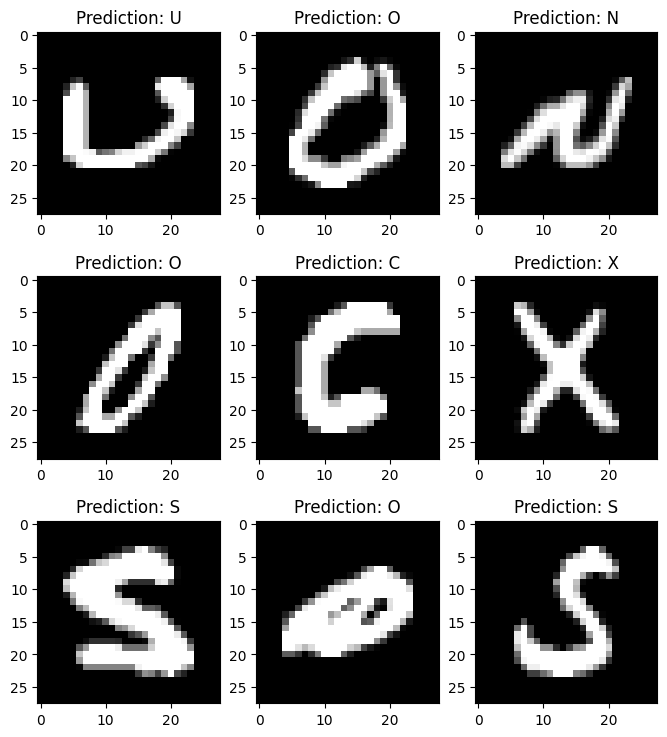

In [11]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img,  cmap=plt.get_cmap('gray'))
    
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)

In [18]:
# Predection on External Image

img = cv2.imread(r'C:/Code/HWR/HW_Code/HW_Code/HW_Code/B.jpg')
img_copy = img.copy()

# chuyển hình đầu vào về kích cỡ 400 x 440 và sang màu xám -> để hình chỉ có 1 chiều (ảnh màu đầu vào sẽ có 3 chiều)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))


img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))



img_pred = word_dict[np.argmax(model.predict(img_final))]

cv2.putText(img, "Image Data", (100,25), cv2.FONT_HERSHEY_DUPLEX , fontScale= 1, thickness=2, color = (255,0,0))
cv2.putText(img, "Character Prediction: " + img_pred, (10,410), cv2.FONT_HERSHEY_SIMPLEX, fontScale= 1, thickness=2, color = (0,0,255))
cv2.imshow('Character Recognition', img)

while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()

1/1 [==============================] - 0s 25ms/step
